In [166]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


In [167]:
df = pd.read_csv('top100_nba_2025_ranked_stats.csv')


In [168]:
features = [
    'PER', 'WS', 'BPM', 'PPG', 'RPG', 'APG', 'FG%', '3P%', 'FT%', 'TS%',
    'MPG', 'SPG', 'BPG', 'TPG'
]
target = 'OVR'


In [169]:
df = df.dropna(subset=features + [target])
X = df[features]
y = df[target]


In [170]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [171]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [172]:
from sklearn.model_selection import cross_val_score
import numpy as np

# 4a. Optional: Cross-validation (5-fold CV)
cv_scores = cross_val_score(rf, X, y, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(-cv_scores)

print("Cross-validation RMSE scores:", cv_rmse_scores)
print(f"Mean CV RMSE: {cv_rmse_scores.mean():.2f}")
print(f"Standard Deviation: {cv_rmse_scores.std():.2f}")


Cross-validation RMSE scores: [5.49030008 2.53372058 2.00584022 1.80536977 2.2308272 ]
Mean CV RMSE: 2.81
Standard Deviation: 1.36


In [173]:
y_pred = rf.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.3f}")


RMSE: 2.07
R² Score: 0.775


In [174]:
df['Predicted_OVR'] = rf.predict(X)
df['Residual'] = df['OVR'] - df['Predicted_OVR']  # Positive = underrated


In [175]:
overrated = df.sort_values(by='Residual', ascending=False).head(10)
underrated = df.sort_values(by='Residual').head(10)

print("Most Underrated Players:")
print(underrated[['Player', 'OVR', 'Predicted_OVR', 'Residual']])

print("\nMost Overrated Players:")
print(overrated[['Player', 'OVR', 'Predicted_OVR', 'Residual']])


Most Underrated Players:
             Player  OVR  Predicted_OVR  Residual
76       Cam Thomas   84          88.97     -4.97
33      LaMelo Ball   88          90.78     -2.78
53   Brandon Ingram   86          88.40     -2.40
29  Zion Williamson   89          91.30     -2.30
31     Franz Wagner   89          91.13     -2.13
83  Trey Murphy III   84          85.50     -1.50
30   Jalen Williams   89          90.43     -1.43
40     Tyrese Maxey   87          88.28     -1.28
36      Tyler Herro   88          89.15     -1.15
51     De'Aaron Fox   86          87.12     -1.12

Most Overrated Players:
                     Player  OVR  Predicted_OVR  Residual
18              Evan Mobley   92          87.07      4.93
4              LeBron James   96          93.80      2.20
20            Kawhi Leonard   91          88.98      2.02
22               Trae Young   91          89.22      1.78
0              Nikola Jokic   98          96.39      1.61
2   Shai Gilgeous-Alexander   98          96.46     

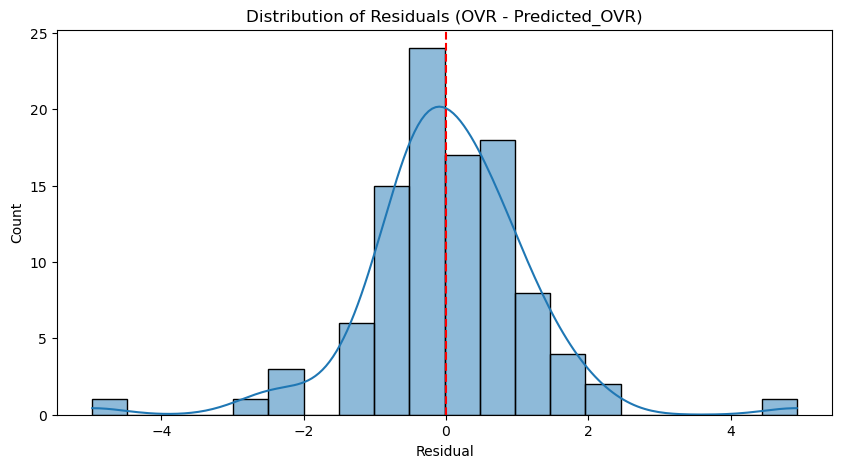

In [176]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Residual'], bins=20, kde=True)
plt.axvline(0, color='red', linestyle='--')
plt.title("Distribution of Residuals (OVR - Predicted_OVR)")
plt.xlabel("Residual")
plt.show()


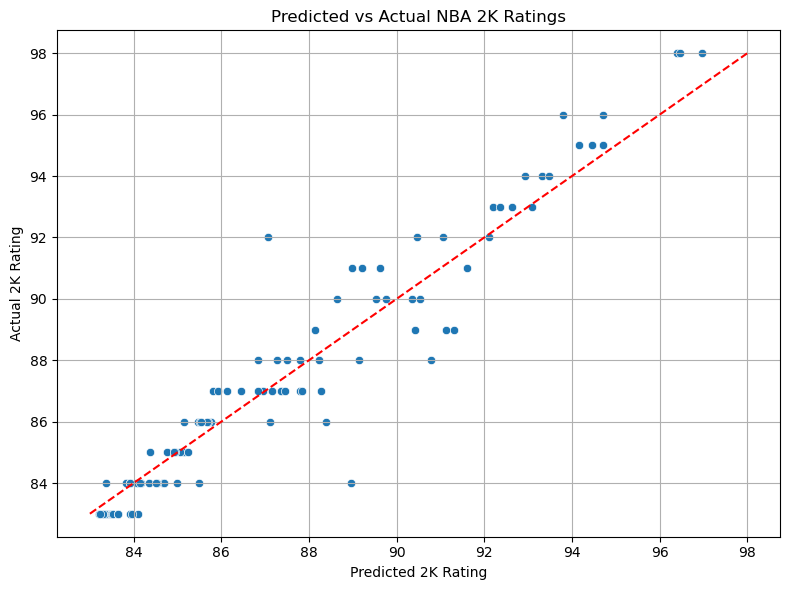

In [177]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Predicted_OVR'], y=df['OVR'])
plt.plot([df['OVR'].min(), df['OVR'].max()], [df['OVR'].min(), df['OVR'].max()], color='red', linestyle='--')
plt.xlabel("Predicted 2K Rating")
plt.ylabel("Actual 2K Rating")
plt.title("Predicted vs Actual NBA 2K Ratings")
plt.grid(True)
plt.tight_layout()
plt.show()


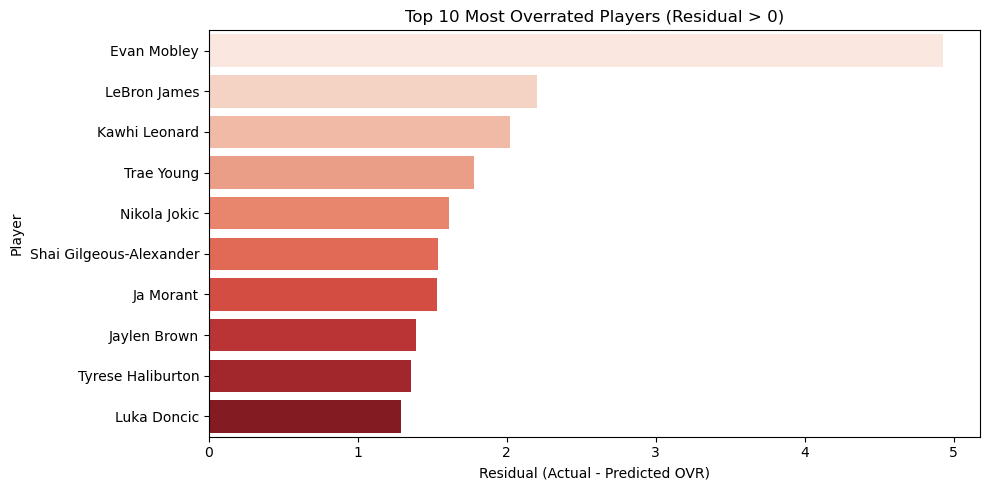

In [178]:
underrated = df.sort_values(by='Residual', ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x='Residual', y='Player', hue = 'Player', data=underrated, palette='Reds')
plt.title("Top 10 Most Overrated Players (Residual > 0)")
plt.xlabel("Residual (Actual - Predicted OVR)")
plt.ylabel("Player")
plt.tight_layout()
plt.show()


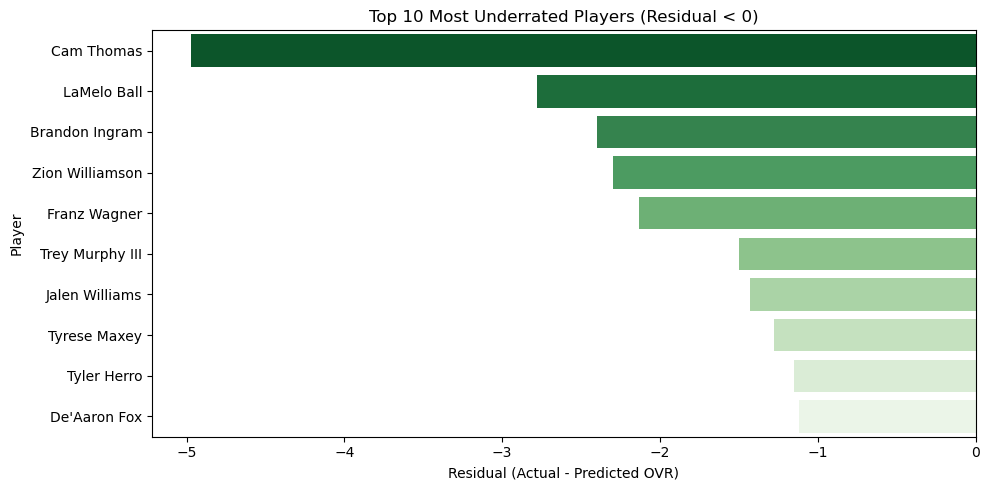

In [179]:
overrated = df.sort_values(by='Residual').head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x='Residual', y='Player', hue = 'Player', data=overrated, palette='Greens_r')
plt.title("Top 10 Most Underrated Players (Residual < 0)")
plt.xlabel("Residual (Actual - Predicted OVR)")
plt.ylabel("Player")
plt.tight_layout()
plt.show()


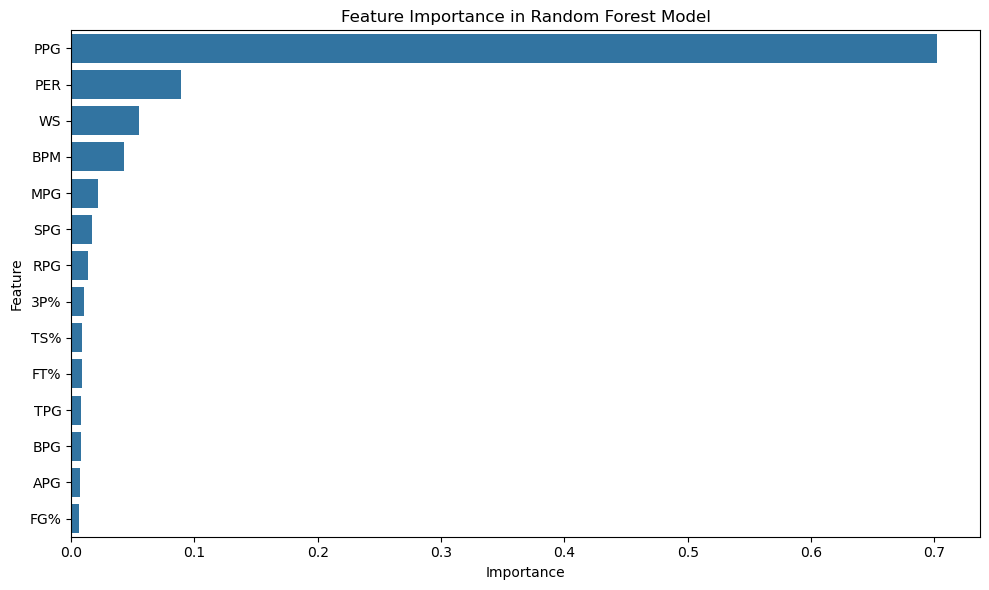

In [180]:
importances = rf.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title("Feature Importance in Random Forest Model")
plt.tight_layout()
plt.show()


In [181]:
# Select useful columns to export
columns_to_export = [
    'Player', 'OVR', 'Predicted_OVR', 'Residual'
] + features  # include your model features for context

# Save to CSV
df[columns_to_export].to_csv('nba2k25_random_forest_predictions.csv', index=False)

print("✅ CSV file saved: nba2k25_random_forest_predictions.csv")


✅ CSV file saved: nba2k25_random_forest_predictions.csv
